In [1]:
from PIL import Image
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('dataset/train_labels.csv', index_col=0)
df2 = pd.read_csv('dataset/val_labels.csv', index_col=0)
df3 = pd.read_csv('dataset/test_labels.csv', index_col=0)
total = pd.concat([df1, df2, df3])

categories = ['Bicycle', 'Motorbike', 'Car-Trailer', 'Car', 'Truck with Trailer', 'Miscellaneous', 
                'Truck', 'Pickup Truck', 'Van', 'Bus']

total['xdim'] = total['x2'] - total['x1']
total['ydim'] = total['y2'] - total['y1']

In [17]:
total[total['label']==6]['file'].value_counts()

Screenshot_2022-09-02_184542.jpg    10
Screenshot_2022-09-02_184403.jpg     4
Screenshot_2022-09-02_191002.jpg     2
Screenshot_2022-09-02_182902.jpg     1
Name: file, dtype: int64

In [23]:
total[total['file'] == 'Screenshot_2022-09-02_191002.jpg']['label'].value_counts()

4    137
7      5
9      4
8      4
6      2
5      1
Name: label, dtype: int64

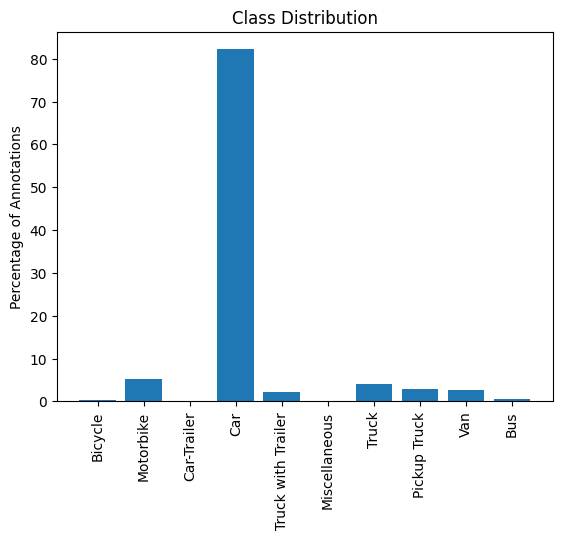

In [15]:
count = np.unique(total['label'], return_counts=True)
perc = count[1]/total.shape[0] * 100
plt.bar(categories, perc)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Annotations')
plt.title('Class Distribution')
plt.show()

In [8]:
count = np.unique(df3['label'], return_counts=True)
perc = count[1]/df3.shape[0] * 100
categories = ['Bicycle', 'Motorbike', 'Car', 'Truck with Trailer', 
                'Truck', 'Pickup Truck', 'Van', 'Bus']
perc

array([5.52028705e-02, 3.91940381e+00, 8.11206183e+01, 1.82169473e+00,
       5.57548993e+00, 3.47778084e+00, 3.11896219e+00, 9.10847364e-01])

[]

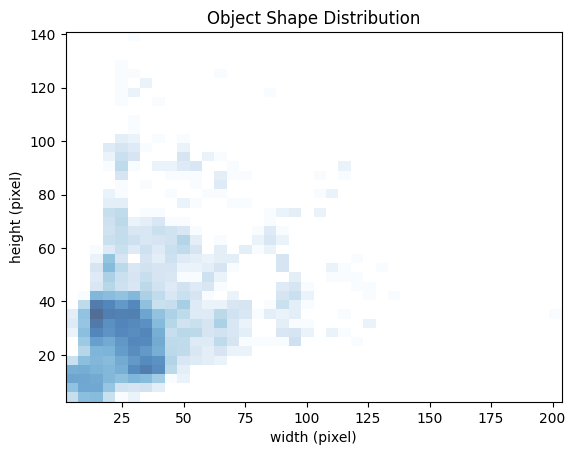

In [57]:
plt.hist2d(x=total['xdim'], y=total['ydim'], bins=40, alpha=0.7, norm='log', cmap='Blues')
plt.xlabel('width (pixel)')
plt.ylabel('height (pixel)')
plt.title('Object Shape Distribution')
plt.plot()

In [17]:
total['area'] = total['xdim'] * total['ydim']
total['small'] = total['area'] < 32**2
total['medium'] = (total['area'] >= 32**2) & (total['area'] < 96**2)
total['large'] = total['area'] >= 96**2
print(total['small'].sum() / total.shape[0] * 100)
print(total['medium'].sum() / total.shape[0] * 100)
print(total['large'].sum() / total.shape[0] * 100)

84.0706456925436
15.900959736498383
0.02839457095803282


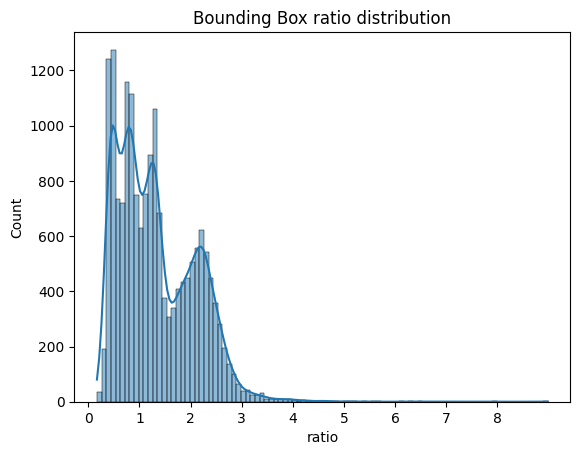

In [20]:
total['ratio'] = total['ydim'] / total['xdim']
sns.histplot(total, x='ratio', kde=True)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.title('Bounding Box ratio distribution')
plt.show()

In [2]:
vedai_train = pd.read_csv('./vedai/train_labels.csv')
vedai_val = pd.read_csv('./vedai/val_labels.csv')
vedai_total = pd.concat([vedai_train, vedai_val])
vedai_cat = ['car', 'truck', 'pickup', 'tractor', 'camping car', 'boat', 'motorcycle', 'bus', 'van', 'other', 'large']
vedai_total['xdim'] = vedai_total['x2'] - vedai_total['x1']
vedai_total['ydim'] = vedai_total['y2'] - vedai_total['y1']

In [6]:
vedai_total['label'].unique().shape

(11,)

In [4]:
vedai_total['label'].value_counts()

1     1377
3      955
5      397
2      307
10     204
4      190
6      171
9      101
12      48
7        4
8        3
Name: label, dtype: int64

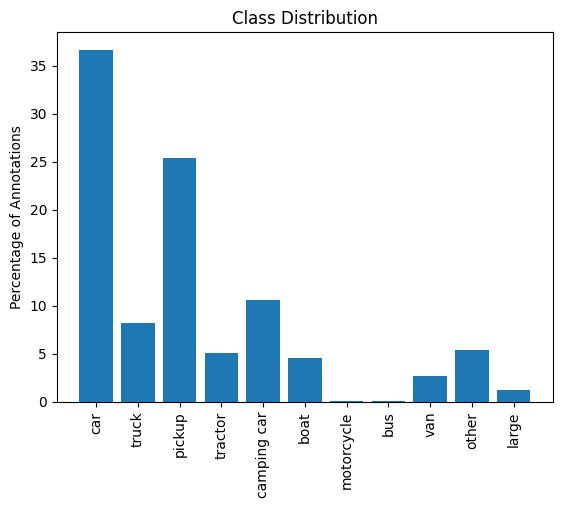

In [14]:
count = np.unique(vedai_total['label'], return_counts=True)
perc = count[1]/vedai_total.shape[0] * 100
plt.bar(vedai_cat, perc)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Annotations')
plt.title('Class Distribution')
plt.show()

[]

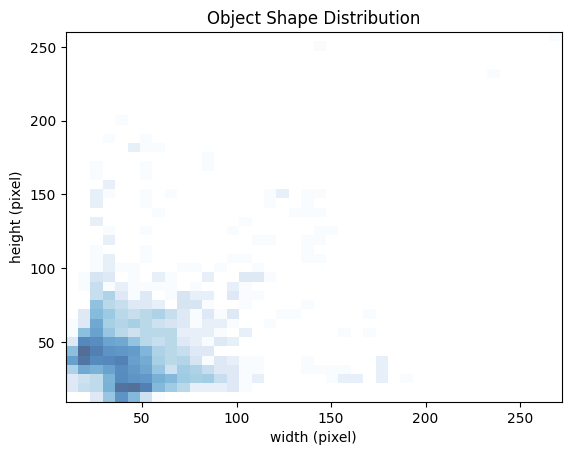

In [17]:
plt.hist2d(x=vedai_total['xdim'], y=vedai_total['ydim'], bins=40, alpha=0.7, norm='log', cmap='Blues')
plt.xlabel('width (pixel)')
plt.ylabel('height (pixel)')
plt.title('Object Shape Distribution')
plt.plot()

In [18]:
vedai_total['area'] = vedai_total['xdim'] * vedai_total['ydim']
vedai_total['small'] = vedai_total['area'] < 32**2
vedai_total['medium'] = (vedai_total['area'] >= 32**2) & (vedai_total['area'] < 96**2)
vedai_total['large'] = vedai_total['area'] >= 96**2
print(vedai_total['small'].sum() / vedai_total.shape[0] * 100)
print(vedai_total['medium'].sum() / vedai_total.shape[0] * 100)
print(vedai_total['large'].sum() / vedai_total.shape[0] * 100)

40.32472717593825
58.50412563215331
1.1711471919084375


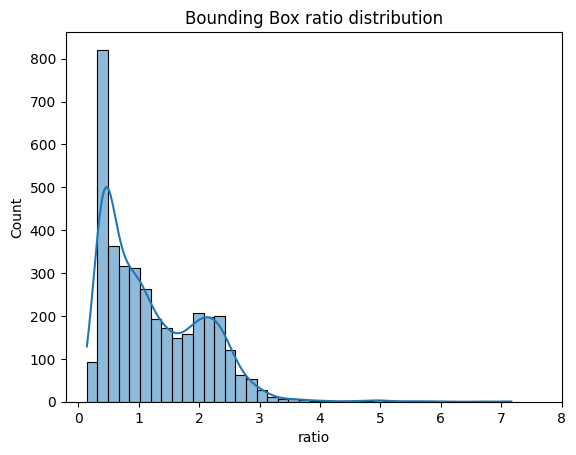

In [19]:
vedai_total['ratio'] = vedai_total['ydim'] / vedai_total['xdim']
sns.histplot(vedai_total, x='ratio', kde=True)
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.title('Bounding Box ratio distribution')
plt.show()